In [111]:
#general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split

from autofeat import AutoFeatRegressor
import lightgbm as lgb
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import KFold

In [112]:
#Read dataset and make ydata-profiling dashboard

#from ydata_profiling import ProfileReport

df = pd.read_csv("../data/datasetRuntimeData.csv")
#Drop index col
df = df.drop(["Unnamed: 0"], axis=1)
#Remove special symbole
df['AutoML_adapter'] = df['AutoML_adapter'].str.replace(':', '')
#Apply one hot encoding
df = pd.get_dummies(df, columns=['AutoML_adapter'], prefix='', prefix_sep='')


#profile = ProfileReport(df, title="Profiling Report")
#profile.to_notebook_iframe()

In [113]:
df.dtypes

dataset_size_in_mb    float64
dataset_rows            int64
dataset_cols            int64
missing_values          int64
duplicated_rows         int64
duplicated_cols         int64
outliers                int64
runtime_limit           int64
autogluon                bool
evalml                   bool
flaml                    bool
gama                     bool
h2o_automl               bool
lama                     bool
pycaret                  bool
tpot                     bool
dtype: object

In [114]:
#AutoFeat for all automls


X = df.drop(["runtime_limit"], axis=1)
y = df["runtime_limit"]

# from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = pd.DataFrame(x_scaler.fit_transform(X), columns=X.columns)
y = pd.Series(y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten())


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### get list of selected features ###
afreg = AutoFeatRegressor(verbose=1)

#X_train = afreg.fit_transform(X_train, y_train)
#X_test = afreg.transform(X_test)
X = afreg.fit_transform(X, y)

2025-02-05 19:22:49,447 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 5565 features.
2025-02-05 19:22:49,449 INFO: [AutoFeat] With 320 data points this new feature matrix would use about 0.01 gb of space.
2025-02-05 19:22:49,450 INFO: [feateng] Step 1: transformation of original features


2025-02-05 19:22:51,483 INFO: [feateng] Generated 28 transformed features from 15 original features - done.
2025-02-05 19:22:51,486 INFO: [feateng] Step 2: first combination of features


2025-02-05 19:22:52,161 INFO: [feateng] Generated 815 feature combinations from 903 original feature tuples - done.
2025-02-05 19:22:52,164 INFO: [feateng] Generated altogether 931 new features in 2 steps
2025-02-05 19:22:52,165 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-02-05 19:22:52,175 INFO: [feateng] Generated a total of 371 additional features
2025-02-05 19:22:52,180 INFO: [featsel] Feature selection run 1/5


[featsel] Scaling data...done.        903 feature tuples combined


2025-02-05 19:22:54,407 INFO: [featsel] Feature selection run 2/5
2025-02-05 19:22:56,379 INFO: [featsel] Feature selection run 3/5
2025-02-05 19:22:58,664 INFO: [featsel] Feature selection run 4/5
2025-02-05 19:23:01,109 INFO: [featsel] Feature selection run 5/5
2025-02-05 19:23:03,260 INFO: [featsel] 19 features after 5 feature selection runs
c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\autofeat\featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-02-05 19:23:03,263 INFO: [featsel] 16 features after correlation filtering
2025-02-05 19:23:03,301 INFO: [featsel] 4 features after noise filtering
2025-02-05 19:23:03,302 INFO: [AutoFeat] Computing 2 new features.


2025-02-05 19:23:03,782 INFO: [AutoFeat]     2/    2 new features ...done.
2025-02-05 19:23:03,785 INFO: [AutoFeat] Final dataframe with 17 feature columns (2 new).
2025-02-05 19:23:03,786 INFO: [AutoFeat] Training final regression model.
2025-02-05 19:23:03,794 INFO: [AutoFeat] Trained model: largest coefficients:
2025-02-05 19:23:03,795 INFO: 0.09149767869851015
2025-02-05 19:23:03,795 INFO: 0.700415 * outliers**2*tpot
2025-02-05 19:23:03,797 INFO: 0.648617 * autogluon*sqrt(dataset_size_in_mb)
2025-02-05 19:23:03,797 INFO: 0.226368 * gama
2025-02-05 19:23:03,798 INFO: 0.191770 * tpot
2025-02-05 19:23:03,800 INFO: [AutoFeat] Final score: 0.1623


In [115]:
X

,dataset_size_in_mb,dataset_rows,dataset_cols,missing_values,duplicated_rows,duplicated_cols,outliers,autogluon,evalml,flaml,gama,h2o_automl,lama,pycaret,tpot,outliers**2*tpot,autogluon*sqrt(dataset_size_in_mb)
0,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
1,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187008
4,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
316,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018768
317,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
318,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [116]:
# #Create prediction plot
# def create_prediction_plot(y_test, predictions):
#     prediction_results = pd.DataFrame({
#         'runtime_limit_is': y_test,
#         'runtime_limit_predicted': predictions
#     })

#     best_case_x = [0, 5, 10, 20, 40, 80, 160, 320, 640]
#     best_case_y = [0, 5, 10, 20, 40, 80, 160, 320, 640]
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(
#         x='runtime_limit_predicted', 
#         y='runtime_limit_is', 
#         data=prediction_results, 
#         color='gray', marker='o'  # Using a distinct color palette
#     )

#     plt.plot(best_case_x, best_case_y)
#     plt.xscale('log', base=10)  # Logarithmic scale for x-axis
#     plt.yscale('log', base=10)  # Logarithmic scale for y-axis


#     # Find the limits in log space
#     x_min, x_max = 1, 100
#     y_min, y_max = 1, np.exp(6.6)

#     # Determine the limits to make them symmetrical in log space
#     log_min = min(np.log10(x_min), np.log10(y_min))
#     log_max = max(np.log10(x_max), np.log10(y_max))

#     # Apply the symmetrical limits
#     plt.xlim([10**log_min, 10**log_max])
#     plt.ylim([10**log_min, 10**log_max])




#     plt.xlabel('Optimal runtime predicted')
#     plt.ylabel('Optimal runtime measured')
#     #plt.legend(title='AutoML Solution', bbox_to_anchor=(1.05, 0.5), loc='center left')
#     #plt.title('Actual vs Predicted Runtime Limits')
#     plt.grid(True)
#     #plt.legend(title='Series')
#     plt.show()
    

In [117]:
def train_model(model, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mae_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        y_test_ = pd.Series(y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten())
        predictions = pd.Series(y_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten())
        
        # Compute MAE
        mae = MAE(predictions, y_test_)
        mae_scores.append(mae)
        
    avg_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)  # Compute standard deviation
    
    print("###############################################")
    print("MAE Scores:", mae_scores)
    print(f"{type(model)} Average MAE across {n_splits} folds: {round(avg_mae, 4)} ± {round(std_mae, 4)}")
    
    
    return model

In [118]:
# def train_model(model,):
#     model.fit(X_train, y_train)
#     predictions = pd.Series(model.predict(X_test))
    

#     y_test_ = pd.Series(y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten())
#     predictions = pd.Series(y_scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten())

#     # Compute MAE
#     mae = MAE(predictions, y_test_)

#     print(f"{type(model)} Mean Absolute Error (MAE):", round(mae))
#     return model

In [119]:
def train_keras(n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mae_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Define the model
        model = Sequential([
            Dense(len(X_train.columns), activation='relu', input_shape=(len(X_train.columns),)),
            Dense(1, activation='linear')
        ])
        
        # Define ModelCheckpoint callback
        checkpoint_callback = ModelCheckpoint(
            './keras_models/2_2_1_best_model.keras', 
            monitor='val_mae',  # Monitor validation loss
            save_best_only=True,  # Save only when validation loss improves
            mode='auto'
        )
        
        early_stopping_callback = EarlyStopping(
            monitor='val_mae',  # Monitor validation MAE
            patience=25,  # Stop training if the validation MAE doesn't improve for 10 epochs
            restore_best_weights=True  # Restore the model weights from the best epoch
        )
        
        # Compile the model
        model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=['mae'])
        model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0, callbacks=[checkpoint_callback, early_stopping_callback], validation_data=(X_test, y_test))
        
        model = tf.keras.models.load_model('./keras_models/2_2_1_best_model.keras')
        predictions = pd.Series(model.predict(X_test).flatten())
        
        y_test_ = pd.Series(y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten())
        predictions = pd.Series(y_scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten())
        
        # Compute MAE
        mae = MAE(predictions, y_test_)
        mae_scores.append(mae)
    
    avg_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)  # Compute standard deviation
    
    print("###############################################")
    print("MAE Scores:", mae_scores)
    print(f"{type(model)} Average MAE across {n_splits} folds: {round(avg_mae, 4)} ± {round(std_mae, 4)}")
    
    
    return model


In [120]:
# def train_keras():
#     import tensorflow as tf
#     from tensorflow import keras
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Dense, Convolution1D
#     from tensorflow.keras.callbacks import ModelCheckpoint

#     # Define the model
#     model = Sequential([
#         Dense(len(X_train.columns), activation='relu', input_shape=(len(X_train.columns),)),  # Input layer (10 features)
#         #Dense(12, activation='relu'),  # Hidden layer 1
#         #Dense(6, activation='relu'),  # Hidden layer 2
#         Dense(1, activation='linear')  # Output layer (for binary classification)
#     ])

#     # Define ModelCheckpoint callback
#     checkpoint_callback = ModelCheckpoint(
#         './keras_models/2_2_1_best_model.h5', 
#         monitor='val_mae',  # Monitor validation loss
#         save_best_only=True,  # Save only when validation loss improves
#         mode='auto',  # We want to minimize validation loss
#         #verbose=1
#     )

#     # Compile the model
#     model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=['mae'])
#     model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0, callbacks=[checkpoint_callback], validation_data=(X_test, y_test))
    
#     model = tf.keras.models.load_model('./keras_models/2_2_1_best_model.h5')
#     predictions = pd.Series(model.predict(X_test).flatten())


#     y_test_ = pd.Series(y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten())
#     predictions = pd.Series(y_scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten())


#     # Compute MAE
#     mae = MAE(predictions, y_test_)

#     print(f"{type(model)} Mean Absolute Error (MAE):", round(mae))

In [121]:
def train_lgbm_model(n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mae_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        train_data = lgb.Dataset(X_train, label=y_train)
        test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
        
        params = {
            'objective': 'regression',
            'metric': 'mae',
            'verbose': -1
        }
        
        num_round = 100
        model = lgb.train(params, train_data, num_round, valid_sets=[test_data])
        
        predictions = pd.Series(model.predict(X_test, num_iteration=model.best_iteration))
        
        y_test_ = pd.Series(y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten())
        predictions = pd.Series(y_scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten())
        
        mae = MAE(predictions, y_test_)
        mae_scores.append(mae)
    
    avg_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)  # Compute standard deviation
    
    print("###############################################")
    print("MAE Scores:", mae_scores)
    print(f"{type(model)} Average MAE across {n_splits} folds: {round(avg_mae, 4)} ± {round(std_mae, 4)}")
    
    
    return model


In [122]:

# def train_lgbm_model():
#     train_data = lgb.Dataset(X_train, label=y_train)
#     test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    

#     # Define parameters for the LightGBM model
#     params = {
#         'objective': 'regression',  # Set the objective as regression
#         'metric': 'mae',            # Use mean absolute error as the evaluation metric
#         'verbose': 1                # Disable verbose output
#     }

#     # Train the LightGBM model
#     num_round = 100
#     model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

#     # Make predictions on the test set
#     predictions = pd.Series(model.predict(X_test, num_iteration=model.best_iteration))
    

#     y_test_ = pd.Series(y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten())
#     predictions = pd.Series(y_scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten())

#     # Compute MAE
#     mae = MAE(predictions, y_test)

#     print(f"{type(model)} Mean Absolute Error (MAE):", round(mae))
#     return model

In [123]:
X.dtypes

dataset_size_in_mb                    float64
dataset_rows                          float64
dataset_cols                          float64
missing_values                        float64
duplicated_rows                       float64
duplicated_cols                       float64
outliers                              float64
autogluon                             float64
evalml                                float64
flaml                                 float64
gama                                  float64
h2o_automl                            float64
lama                                  float64
pycaret                               float64
tpot                                  float64
outliers**2*tpot                      float64
autogluon*sqrt(dataset_size_in_mb)    float64
dtype: object

In [124]:

models = { "Baseline": DummyRegressor(strategy="median"), 
          "LightGBM": None, 
          "Linear Regression": LinearRegression(), 
          "Decision Tree": DecisionTreeRegressor(random_state=42), 
          "Sklearn Neural Network": MLPRegressor(random_state=42), 
          "Keras Neural Network": None, 
          "Ridge": Ridge(), 
          "Lasso": Lasso(), 
          "Elastic": ElasticNet(), 
          "Random Forest": RandomForestRegressor(), 
          "Bayesian": BayesianRidge(), 
          "SVM": SVR()}


for model_name, model in models.items():
    if model_name == "LightGBM":
        models[model_name] = train_lgbm_model()
    elif model_name == "Keras Neural Network":
        models[model_name] = train_keras()
    else:
        models[model_name] = train_model(model)


###############################################
MAE Scores: [104.375, 105.15625, 155.15625, 121.5625, 106.40625, 93.4375, 51.71875, 85.3125, 75.46875, 109.84375]
<class 'sklearn.dummy.DummyRegressor'> Average MAE across 10 folds: 100.8438 ± 26.2209
###############################################
MAE Scores: [110.3524471313257, 121.64497003493213, 152.96847380536764, 156.29693485664998, 127.75360537434511, 102.95552017080863, 83.24775471229219, 101.81825345460342, 130.42175794695277, 129.00168008225938]
<class 'lightgbm.basic.Booster'> Average MAE across 10 folds: 121.6461 ± 21.6671
###############################################
MAE Scores: [108.02825927734375, 95.89923858642578, 138.97341987048287, 147.724609375, 103.58230590820312, 107.0233154296875, 83.9703369140625, 108.2537841796875, 135.54625180500994, 127.843017578125]
<class 'sklearn.linear_model._base.LinearRegression'> Average MAE across 10 folds: 115.6845 ± 19.6057
###############################################
MAE Scores: 

c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


c:\Users\alex\Desktop\MetaAutoML\utils\analysis\ai_based_optimization\predicting_optimal_runtime\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
###############################################
MAE Scores: [90.6266710832715, 82.76034580171108, 142.70368683338165, 125.32303938269615, 105.48698895424604, 87.99034056067467, 53.64774218201637, 88.45266522094607, 80.94712997414172, 116.80009731650352]
<class 'keras.src.models.sequential.Sequential'> Average MAE across 10 folds: 97.4739 ± 24.2643
###############################################
MAE Scores: [106.01065576925842, 108.10909125651855, 145.80106547413405, 153.00410262756947, 110.65268434132555, 103.00041632744406, 84.09094219779323, 103.40644776981307, 127.22696877430833, 129.79981659284502]
<class 'sklearn.linear_model._ridge.Ridge'> Average MAE across 10 folds: 117.1102 ± 20.2435
###############################################
MAE Scores: [118.50260416666667, 144.55729166666669, 182.861328125, 160.78125, 130.59895833333334, 124.61805555555556, 99.990234375, 112.53472222222223, 125.771484375, 132.48046875]
<class 'sklearn.linear_model._

In [125]:
X_all

,dataset_size_in_mb,dataset_rows,dataset_cols,missing_values,duplicated_rows,duplicated_cols,outliers,autogluon,evalml,flaml,gama,h2o_automl,lama,pycaret,tpot,outliers**2*tpot,autogluon*sqrt(dataset_size_in_mb)
0,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
1,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187008
4,0.034972,0.928289,0.000932,0.0,1.000000,0.0,0.000234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
316,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018768
317,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
318,0.000352,0.000315,0.007454,0.0,0.000265,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


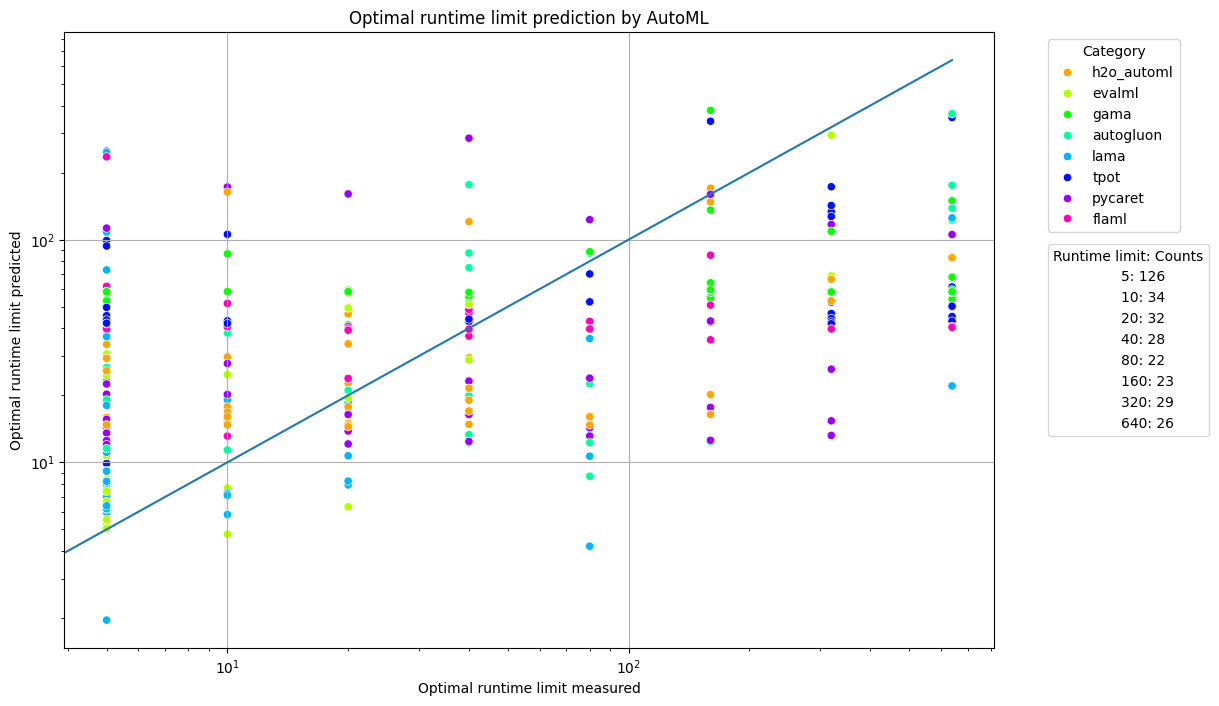

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

# Combine train and test data for predictions
# X_all = pd.concat([X_train[selected_feature], X_test[selected_feature]])
# y_all = pd.concat([y_train, y_test])
X_all = X
y_all = y

# Make predictions
predictions = pd.Series(models["Keras Neural Network"].predict(X_all).flatten())

y_all = pd.Series(y_scaler.inverse_transform(y_all.values.reshape(-1, 1)).flatten())
predictions = pd.Series(y_scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten())
        
# Create a DataFrame for results
result_df = X_all.copy()
result_df['runtime_limit_is'] = y_all.values
result_df['runtime_limit_predicted'] = predictions

# Assign categories manually based on the one-hot encoded columns
def get_category(row, category_columns):
    for col in category_columns:
        if row[col] == 1:
            return col.replace('category_', '')
    return None

# Find the one-hot encoded column where it's true for each row
category_columns = ["autogluon", "evalml", "flaml", "gama", "h2o_automl", "lama", "pycaret", "tpot"]
result_df['category'] = result_df.apply(get_category, axis=1, category_columns=category_columns)

# Count the number of dots per x-axis class
dot_counts = result_df['runtime_limit_is'].value_counts().sort_index()

# Plot using Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    y='runtime_limit_predicted',
    x='runtime_limit_is',
    hue='category',
    data=result_df,
    palette=sns.color_palette("hsv", len(result_df['category'].unique()))  # Using a distinct color palette
)

# Add a custom legend for the categories
handles, labels = scatter.get_legend_handles_labels()
category_legend = plt.legend(handles, labels, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().add_artist(category_legend)

# Create a second legend for the counts with no markers
count_labels = [f'{int(key)}: {value}' for key, value in dot_counts.items()]
count_legend_handles = [Line2D([0], [0], color='white', label=label) for label in count_labels]
count_legend = plt.legend(count_legend_handles, count_labels, title='Runtime limit: Counts', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Add the best case line
best_case_x = [0, 5, 10, 20, 40, 80, 160, 320, 640]
best_case_y = [0, 5, 10, 20, 40, 80, 160, 320, 640]
plt.plot(best_case_x, best_case_y)

# Set logarithmic scales
plt.xscale('log', base=10)
plt.yscale('log', base=10)

# Set labels and title
plt.ylabel('Optimal runtime limit predicted')
plt.xlabel('Optimal runtime limit measured')
plt.title('Optimal runtime limit prediction by AutoML')

# Ensure grid is enabled
plt.grid(True)

# Adjust layout to make space for legends
#plt.subplots_adjust(right=0.75)

plt.show()
